# Speech Recognition and Natural Language Processing

Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('E:\Speech_recognition'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:\Speech_recognition\sample_submission.7z
E:\Speech_recognition\train.7z
E:\Speech_recognition\train\train\LICENSE
E:\Speech_recognition\train\train\README.md
E:\Speech_recognition\train\train\testing_list.txt
E:\Speech_recognition\train\train\validation_list.txt
E:\Speech_recognition\train\train\audio\bed\00176480_nohash_0.wav
E:\Speech_recognition\train\train\audio\bed\004ae714_nohash_0.wav
E:\Speech_recognition\train\train\audio\bed\004ae714_nohash_1.wav
E:\Speech_recognition\train\train\audio\bed\00f0204f_nohash_0.wav
E:\Speech_recognition\train\train\audio\bed\00f0204f_nohash_1.wav
E:\Speech_recognition\train\train\audio\bed\012c8314_nohash_0.wav
E:\Speech_recognition\train\train\audio\bed\012c8314_nohash_1.wav
E:\Speech_recognition\train\train\audio\bed\0132a06d_nohash_0.wav
E:\Speech_recognition\train\train\audio\bed\0135f3f2_nohash_0.wav
E:\Speech_recognition\train\train\audio\bed\0137b3f4_nohash_0.wav
E:\Speech_recognition\train\train\audio\bed\014f9f65_nohash_0.wav
E:\Speech

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
!pip install pyunpack
!pip install patool
!pip install py7zr
!pip install resampy
!pip install keras
!pip install tensorflow

In [3]:
#from py7zr import unpack_7zarchive
#import shutil

# Check existing formats
#formats = shutil.get_unpack_formats()

# Unregister if '7zip' is already registered#
#for format in formats:
#    if format[0] == '7zip':
#        shutil.unregister_unpack_format('7zip')
#        break

# Register the '7zip' format
#shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive)

#print('7zip format registered successfully')

#shutil.unpack_archive('E:/Speech_recognition/train.7z', 'E:/Speech_recognition/train')

#print("Done")

In [4]:
#from pyunpack import Archive
# import shutil
# if not os.path.exists('/kaggle/working/tensorflow-speech-recognition-challenge/train/'):
#     os.makedirs('/kaggle/working/tensorflow-speech-recognition-challenge/train/')
 
for dirname, _, filenames in os.walk('E:/Speech_recognition/train/train/audio/'):
    for filename in filename[:5]:
        print(os.path.join(dirname, filename))

E:/Speech_recognition/train/train/audio/w
E:/Speech_recognition/train/train/audio/h
E:/Speech_recognition/train/train/audio/i
E:/Speech_recognition/train/train/audio/t
E:/Speech_recognition/train/train/audio/e
E:/Speech_recognition/train/train/audio/bed\e
E:/Speech_recognition/train/train/audio/bird\e
E:/Speech_recognition/train/train/audio/cat\e
E:/Speech_recognition/train/train/audio/dog\e
E:/Speech_recognition/train/train/audio/down\e
E:/Speech_recognition/train/train/audio/eight\e
E:/Speech_recognition/train/train/audio/five\e
E:/Speech_recognition/train/train/audio/four\e
E:/Speech_recognition/train/train/audio/go\e
E:/Speech_recognition/train/train/audio/happy\e
E:/Speech_recognition/train/train/audio/house\e
E:/Speech_recognition/train/train/audio/left\e
E:/Speech_recognition/train/train/audio/marvin\e
E:/Speech_recognition/train/train/audio/nine\e
E:/Speech_recognition/train/train/audio/no\e
E:/Speech_recognition/train/train/audio/off\e
E:/Speech_recognition/train/train/audio/o

In [5]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display as ipd
from scipy.io import wavfile
import resampy

Importing the data
training the audio path

In [6]:
train_audio_path = 'E:/Speech_recognition/train/train/audio/'

# Data Visualization

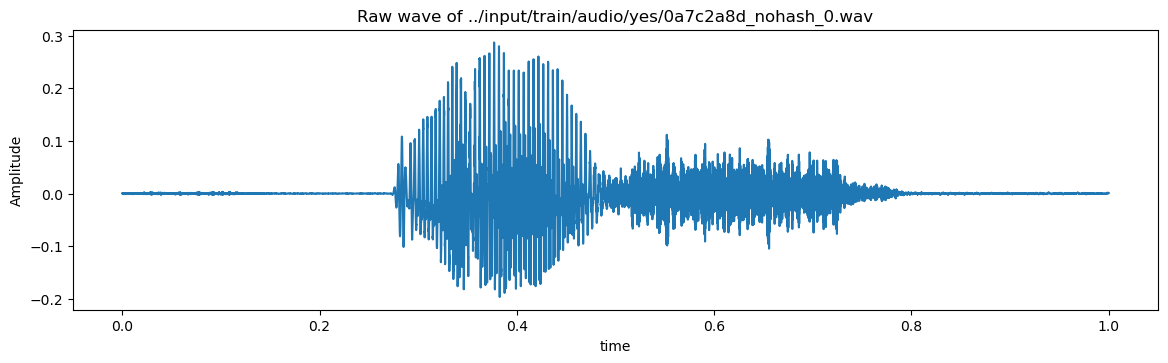

In [7]:
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

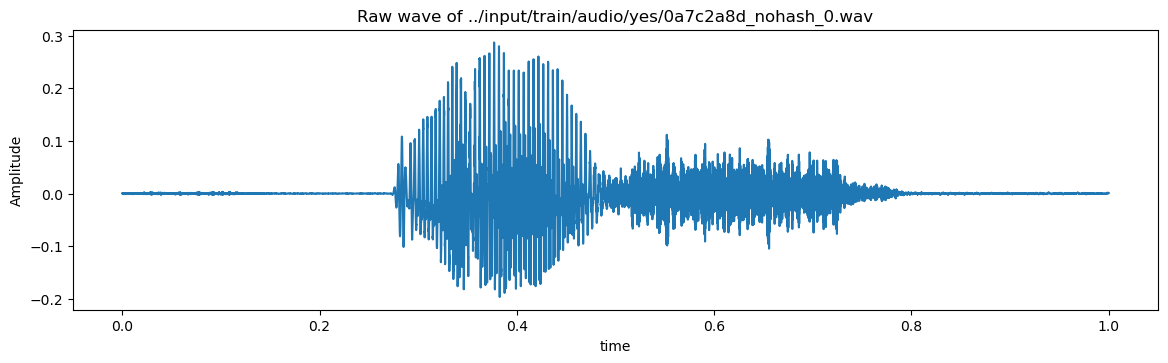

In [8]:
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

# Training the audio samples

In [9]:
sample_rate=40000
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [10]:
sample_rate=16000
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [11]:
sample_rate=6000
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [12]:
sample_rate=3000
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [13]:
samples = librosa.resample(samples, orig_sr=sample_rate, target_sr=8000)
ipd.Audio(samples, rate=8000)

In [14]:
labels=os.listdir(train_audio_path)

# Data Visualization- bar graph

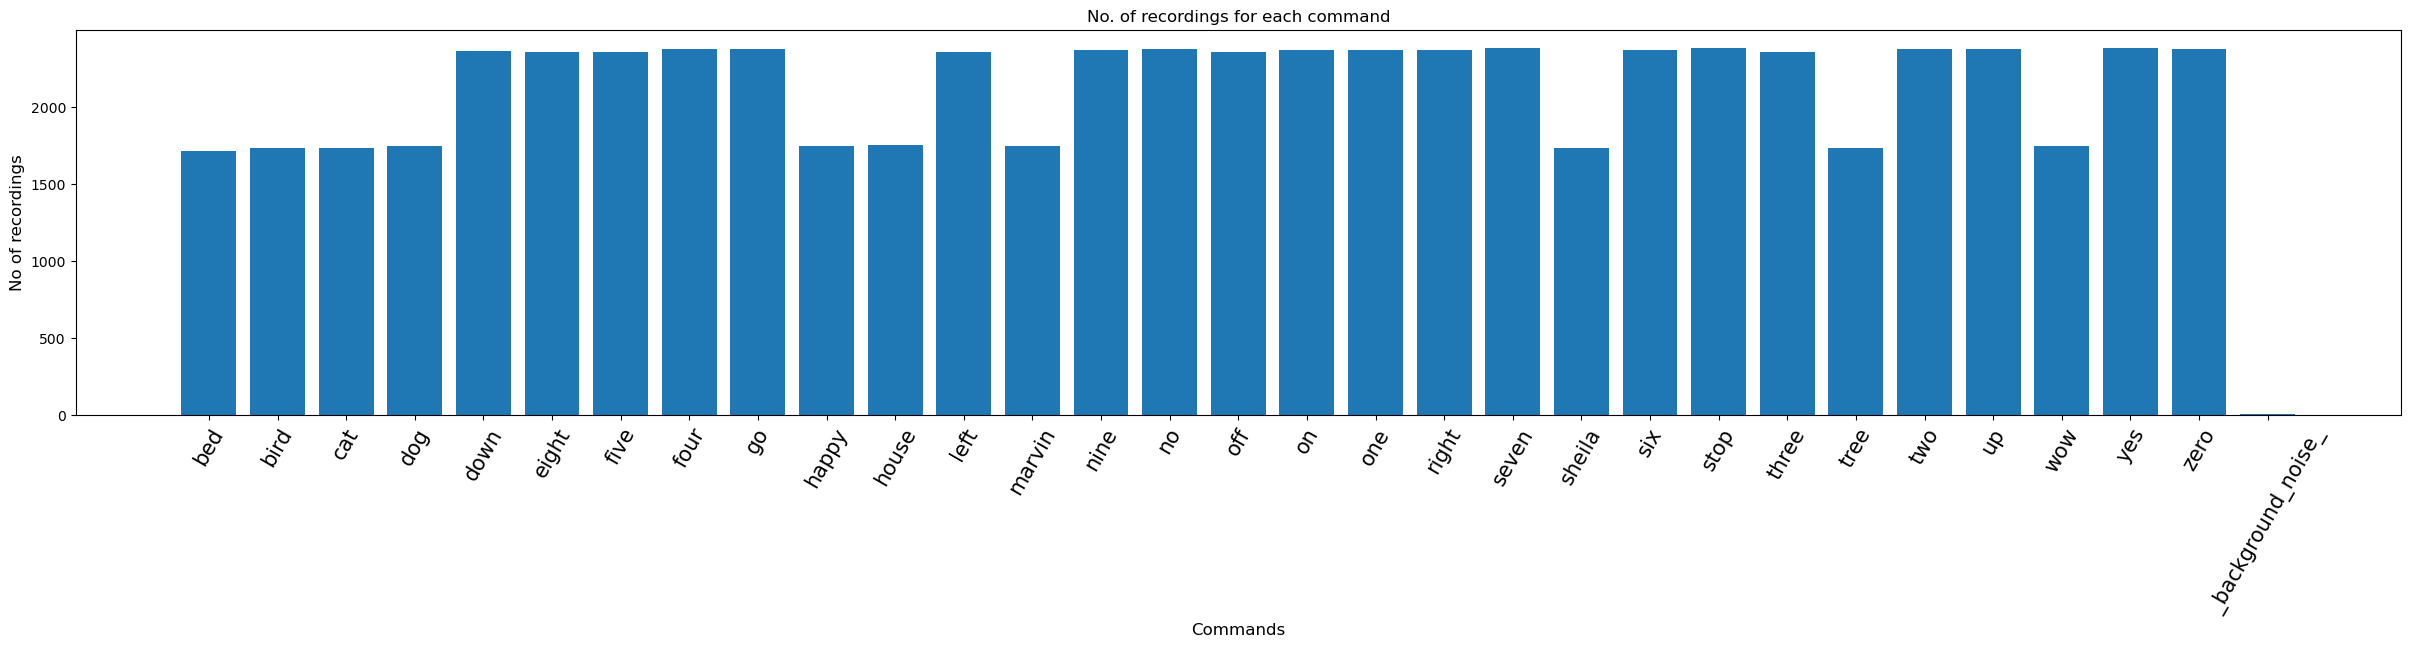

In [15]:
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [16]:
# labels=["yes", "no","stop", "go"]
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

Bar Plot for samplings

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

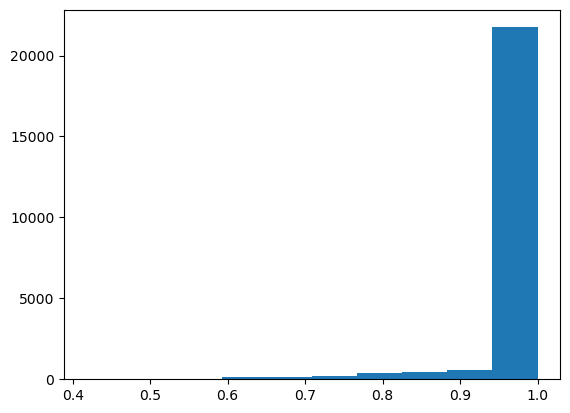

In [17]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [18]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, orig_sr=sample_rate, target_sr=8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [19]:
print(type(all_wave))
print(len(all_wave))

<class 'list'>
21312


In [20]:
print(len(all_wave))
print(all_wave[1].shape)
all_wave[1]

21312
(8000,)


array([0.00040267, 0.00062703, 0.00036664, ..., 0.00081659, 0.0004811 ,
       0.00071751], dtype=float32)

In [21]:
len(set(all_label))

10

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [23]:
classes

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [24]:
from keras.utils import to_categorical
y= to_categorical(y, num_classes=len(labels))

In [25]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [26]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [27]:
all_wave.shape

(21312, 8000, 1)

Spliting the data into Train and test sets

In [28]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [29]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

In [30]:
# ?Conv1D

In [31]:
inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(filters=8,kernel_size=13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)
#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 8000, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 7988, 8)             │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2662, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2662, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 2652, 16)            │           1,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 884, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 884, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 876, 32)             │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 292, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 292, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 286, 64)             │          14,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 95, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 95, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6080)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,556,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,611,498 (6.15 MB)

 Trainable params: 1,611,498 (6.15 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [34]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.1726 - loss: 2.1704 - val_accuracy: 0.4624 - val_loss: 1.5017
Epoch 2/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 45s 84ms/step - accuracy: 0.4518 - loss: 1.4947 - val_accuracy: 0.5351 - val_loss: 1.2854
Epoch 3/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 45s 85ms/step - accuracy: 0.5736 - loss: 1.2158 - val_accuracy: 0.6533 - val_loss: 0.9839
Epoch 4/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 45s 84ms/step - accuracy: 0.6410 - loss: 1.0457 - val_accuracy: 0.6976 - val_loss: 0.9049
Epoch 5/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 45s 84ms/step - accuracy: 0.6876 - loss: 0.9211 - val_accuracy: 0.7312 - val_loss: 0.7854
Epoch 6/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 44s 83ms/step - accuracy: 0.7119 - loss: 0.8341 - val_accuracy: 0.7621 - val_loss: 0.7146
Epoch 7/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 44s 82ms/step - accuracy: 0.7592 - loss: 0.7041 - val_accuracy: 0.7589 - val_loss: 0.7142
Epoch 8/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.7638 - loss: 0

Plot between train and test sets

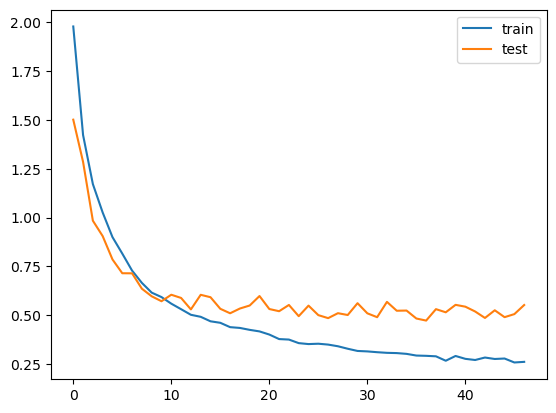

In [35]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Loading the model

In [164]:
from keras.models import load_model
model.save("E:/Speech_recognition/SpeechRecogModel.keras")

In [165]:
def predict(audio):
    new_model=load_model('E:/Speech_recognition/SpeechRecogModel.keras')
    prob=new_model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [166]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: right


In [167]:
print("Text:",predict(samples))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
Text: right


Importing the necessary libraries for the sounddevice and soundfile

In [168]:
! pip install sounddevice==0.2.1

import sounddevice as sd
import soundfile as sf

In [174]:
samplerate = 16000  
duration = 1 # seconds
filename = 'yes.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)

start
end


# Reading the Voice Commands

In [175]:
filepath = 'C:/Users/vinnu'
samples, sample_rate = librosa.load(filepath + '/' + 'yes.wav', sr = 16000)
samples = librosa.resample(samples, orig_sr=sample_rate, target_sr=8000)
ipd.Audio(samples,rate=8000)   

# Converting Voice Commands to text

In [176]:
def predict(audio):
    new_model=load_model('E:/Speech_recognition/SpeechRecogModel.keras')
    prob=new_model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

predict(samples)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


'no'